# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
    
#### New Libraries to intsall:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`
    
                                                                                            
                                                                                           

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [15]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [16]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (2840, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [17]:
# Answer here
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
# nltk.download('wordnet')


* without stopword

In [18]:
def word_frequency(sentence):
    # joins all the sentenses
    sentence =" ".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    #creates 1 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq

In [19]:
freq1 = word_frequency(train_df.text.to_list())
freq2 = word_frequency(test_df.text.to_list())

[Text(0.5, 1.0, 'test datasets without stopword')]

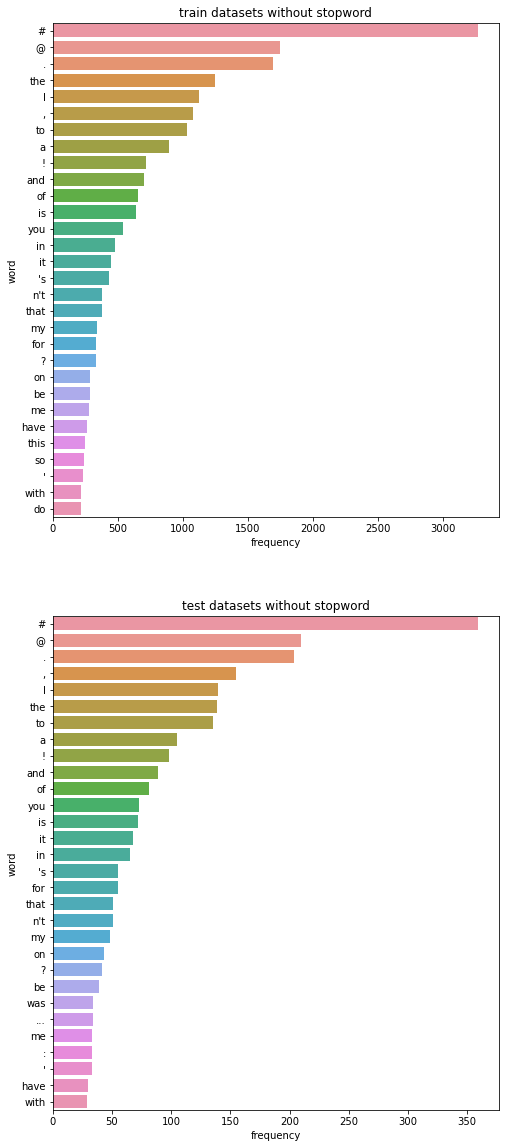

In [20]:
# create subplot of the different data frames
fig, axes = plt.subplots(2,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=freq1.head(30)).set(title='train datasets without stopword')
sns.barplot(ax=axes[1],x='frequency',y='word',data=freq2.head(30)).set(title='test datasets without stopword')

* with stopword

In [21]:
def word_frequency(sentence):
    # joins all the sentenses
    sentence =" ".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words
    counted = Counter(new_tokens)
    #creates 1 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq

In [22]:
freq1 = word_frequency(train_df.text.to_list())
freq2 = word_frequency(test_df.text.to_list())

[Text(0.5, 1.0, 'test datasets with stopword')]

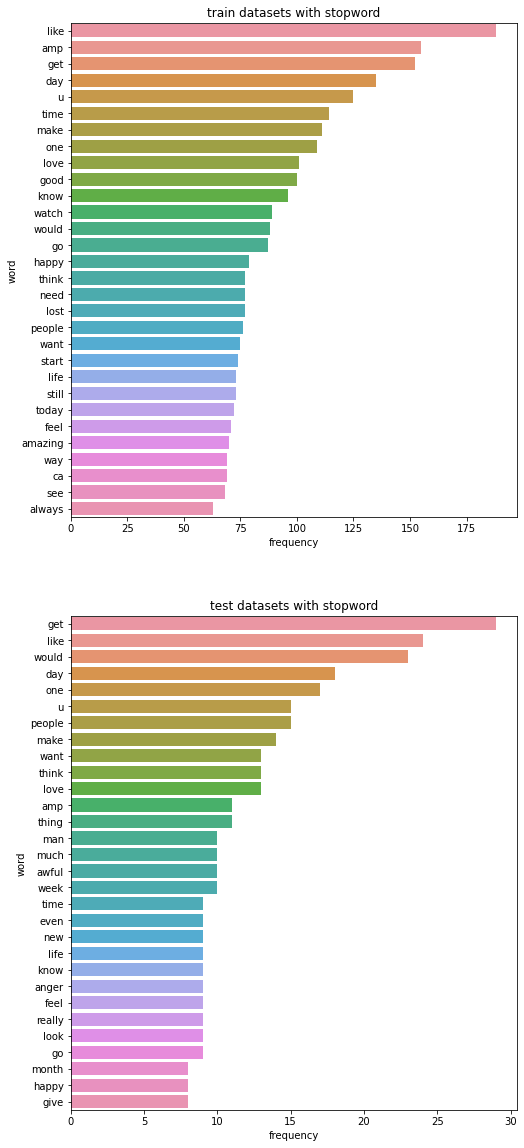

In [23]:
# create subplot of the different data frames
fig, axes = plt.subplots(2,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=freq1.head(30)).set(title='train datasets with stopword')
sns.barplot(ax=axes[1],x='frequency',y='word',data=freq2.head(30)).set(title='test datasets with stopword')

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [24]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [25]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [26]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger        84
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

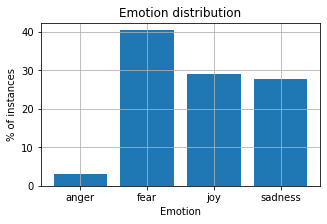

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [30]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [31]:
# check the result
train_data_BOW_features

<2840x8619 sparse matrix of type '<class 'numpy.int64'>'
	with 40849 stored elements in Compressed Sparse Row format>

In [32]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [33]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
# check the dimension
train_data_BOW_features.shape

(2840, 8619)

In [35]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['40', '400', '4000', '400k', '41', '416', '42', '420', '45', '450']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [36]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [37]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(2840, 500)

In [38]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['cheerfully',
 'cheering',
 'cheery',
 'chirp',
 'come',
 'comes',
 'concern',
 'could',
 'country',
 'customer']

In [40]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [41]:
type(test_df['text'])

pandas.core.series.Series

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

* train data

In [43]:
Tfid_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
train_data_Tfid_1000 = Tfid_1000.fit_transform(train_df['text'])
feature_names_1000 = Tfid_1000.get_feature_names()
feature_names_1000[100:110]

['ask',
 'asked',
 'ass',
 'assume',
 'at',
 'attack',
 'attacks',
 'awareness',
 'away',
 'awe']

* test data

In [44]:
Tfid_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
test_data_Tfid_1000 = Tfid_1000.fit_transform(test_df['text'])
feature_names_1000 = Tfid_1000.get_feature_names()
feature_names_1000[100:110]

['appreciated',
 'arch',
 'are',
 'arms',
 'around',
 'as',
 'asked',
 'assistance',
 'at',
 'attempt']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (2840, 500)
y_train.shape:  (2840,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [46]:
X_train

<2840x500 sparse matrix of type '<class 'numpy.int64'>'
	with 34125 stored elements in Compressed Sparse Row format>

In [47]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_DTpred = DT_model.predict(X_train)
y_test_DTpred = DT_model.predict(X_test)

## so we get the pred result
y_test_DTpred[:10]

array(['anger', 'fear', 'anger', 'fear', 'joy', 'anger', 'sadness',
       'fear', 'fear', 'joy'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [48]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_DTpred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_DTpred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.75


In [49]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_DTpred))

# this cases is well-balanced

              precision    recall  f1-score   support

       anger       0.91      1.00      0.95        84
        fear       0.68      0.71      0.70       110
         joy       0.69      0.68      0.69        79
     sadness       0.71      0.61      0.66        74

    accuracy                           0.75       347
   macro avg       0.75      0.75      0.75       347
weighted avg       0.75      0.75      0.75       347



In [50]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_DTpred) 
print(cm)

[[84  0  0  0]
 [ 5 78 15 12]
 [ 0 19 54  6]
 [ 3 17  9 45]]


In [51]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

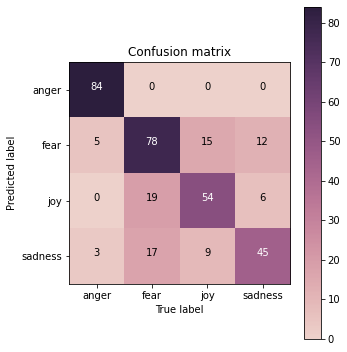

In [52]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

* By the confusion matrix, we can know where our models are having problems and make a quick fix.

ex. there are actually 75 predict of anger is anger, and due to its high data takes the darkest color.
-> the darker the color means the more correction it made.

ex. by the 7 of the mistaken of joy for anger, and the 6 of the mistaken of anger for joy.
-> they have the least mistaken times than others, and it means that joy and anger are more distinguishable features than others.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
## build Naive Bayes classifier for multinomial models
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_NBpred = NB_model.predict(X_train)
y_test_NBpred = NB_model.predict(X_test)

## so we get the pred result
y_test_NBpred[:10]

array(['anger', 'fear', 'fear', 'fear', 'fear', 'fear', 'sadness', 'joy',
       'sadness', 'joy'], dtype='<U7')

In [55]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_NBpred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_NBpred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.83
testing accuracy: 0.66


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [56]:
# Answer here
y_test_DTpred[:10]
type(y_test_DTpred)
len(y_test_DTpred.tolist())

347

In [57]:
y_test_NBpred[:10]
len(y_test_NBpred.tolist())

347

In [58]:
diffCnt = 0
for i in range(347):
    if y_test_DTpred[i] != y_test_NBpred[i]:
        diffCnt = diffCnt + 1
diffCnt

135

In [59]:
test_df['emotion']

345    sadness
125       fear
58       anger
146       fear
144       fear
        ...   
18       anger
122       fear
344    sadness
241        joy
69       anger
Name: emotion, Length: 347, dtype: object

In [60]:
y_test

345    sadness
125       fear
58       anger
146       fear
144       fear
        ...   
18       anger
122       fear
344    sadness
241        joy
69       anger
Name: emotion, Length: 347, dtype: object

In [61]:
y_test_DTpred[346] == y_test[346]

False

In [62]:
len(y_test_DTpred.tolist())

347

In [63]:
sameCnt = 0
for i in range(347):
    if y_test_DTpred[i] == y_test[i]:
        sameCnt = sameCnt + 1
sameCnt

84

In [64]:
83/347

0.23919308357348704

In [65]:
diffCnt = 0
for i in range(347):
    if y_test_NBpred[i] != y_test[i]:
        diffCnt = diffCnt + 1
diffCnt

254

There are 114 differences between the results of Naive Bayes model and the Decision Tree model.

* Decision Tree model
    - training accuracy: 0.99
    - testing accuracy: 0.66
* Naive Bayes model
    - training accuracy: 0.79
    - testing accuracy: 0.7

https://stackoverflow.com/questions/10317885/decision-tree-vs-naive-bayes-classifier

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 

* Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
* Trying different models
* Analyzing your results and interpret them to improve your feature engineering/model building process
* Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [66]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


Error: Session cannot generate requests

### 6.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

Error: Session cannot generate requests

![Imgur](pics/pic2.png)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Error: Session cannot generate requests

### 6.4 Train

In [30]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../input/datamininglab2/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

Error: Session cannot generate requests

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

Error: Session cannot generate requests

In [63]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

In [64]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("../input/datamininglab2/logs/training_log.csv")
training_log

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [ ]:
# Answer here
import matplotlib.pyplot as plt

plt.plot(training_log.epoch.to_list(), training_log.accuracy.to_list(), color=(100/255,100/255,255/255))
plt.plot(training_log.epoch.to_list(), training_log.val_accuracy.to_list(), color=(255/255,100/255,100/255))

plt.title("Training accuracy per epoch") # title
plt.ylabel("Accuracy") # y label
plt.xlabel("Epoch") # x label
plt.legend(['Training accuracy','Val accuracy'], loc="upper right")

Error: Session cannot generate requests

In [ ]:
plt.plot(training_log.epoch.to_list(), training_log.loss.to_list(), color=(100/255,100/255,255/255))
plt.plot(training_log.epoch.to_list(), training_log.val_loss.to_list(), color=(255/255,100/255,100/255))

plt.title("Training accuracy per epoch") # title
plt.ylabel("Accuracy") # y label
plt.xlabel("Epoch") # x label
plt.legend(['Training loss','Val loss'], loc="upper right")

Error: Session cannot generate requests

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [4]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore') 

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

NameError: name 'train_df' is not defined

In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

Error: Session cannot generate requests

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

Error: Session cannot generate requests

In [70]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [2]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

NameError: name 'word2vec_model' is not defined

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

Error: Session cannot generate requests

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

**-> words use together**

In [13]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912951469421),
 ('overjoyed', 0.6599285006523132),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.6360421180725098),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269948482513428),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-datays

**-> words used in the similar way**

In [5]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
# import ssl
# import urllib.request
# ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.wv.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


AttributeError: 'KeyedVectors' object has no attribute 'wv'

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [77]:
w2v_google_model.wv.most_similar(positive=['king', 'woman'], negative=['man'])

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


**Solution**</br>
* First: utilize spacy's lemma_ to get the result of lemmatizing.
* Second: utilize word2vec_model.wv[word.lemma_] get the word embeddings, and end up taking the average of the word embeddings in the whole stentence.

In [27]:
import spacy
import spacy.cli
spacy.cli.download("en_core_web_md")

ModuleNotFoundError: No module named 'spacy'

In [25]:
nlp = spacy.load('en_core_web_md', disable=["ner", "parser"])

NameError: name 'spacy' is not defined

In [23]:
import numpy as np
# Get all words from wiki word2vec model
model = w2v_google_model
model_words = set(model.index_to_key)

def text2vec_raw(w2vmodel, text):
  text = "%s" % (text)
  doc = nlp(text)
  # convert a movie review into vectors
  text_vecs = [w2vmodel.wv[word.lemma_] for word in doc if word.lemma_ in model_words]
  print(type(text_vecs))
  # calculate the mean of the vectors and return
  global res
  if len(text_vecs) > 1:
    res =  np.mean(text_vecs, axis = 0)
    return res
  elif len(text_vecs) == 1:
    return res[0]
  else:
    return np.nan

In [24]:
train_df['vectors'] = train_df['text'].apply(lambda x: text2vec_raw(model, x))

NameError: name 'nlp' is not defined

In [ ]:
test_df['vectors'] = test_df['text'].apply(lambda x: text2vec_raw(model, x))

In [ ]:
vector_df = pd.DataFrame(train_df.vectors.tolist(), columns=['vectors'])
vector_df['emotion'] = train_df['emotion'].values

* Third: Take Random Forest Classifier for example

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
Y = vector_df['emotion'].values
X = vector_df['vectors'].values
 
scores = cross_val_score(clf, X, Y, cv = 3)

In [ ]:
print(scores.mean())

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [86]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

In [87]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

![Imgur](pics/pic6.png)

In [88]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

In [89]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [17]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

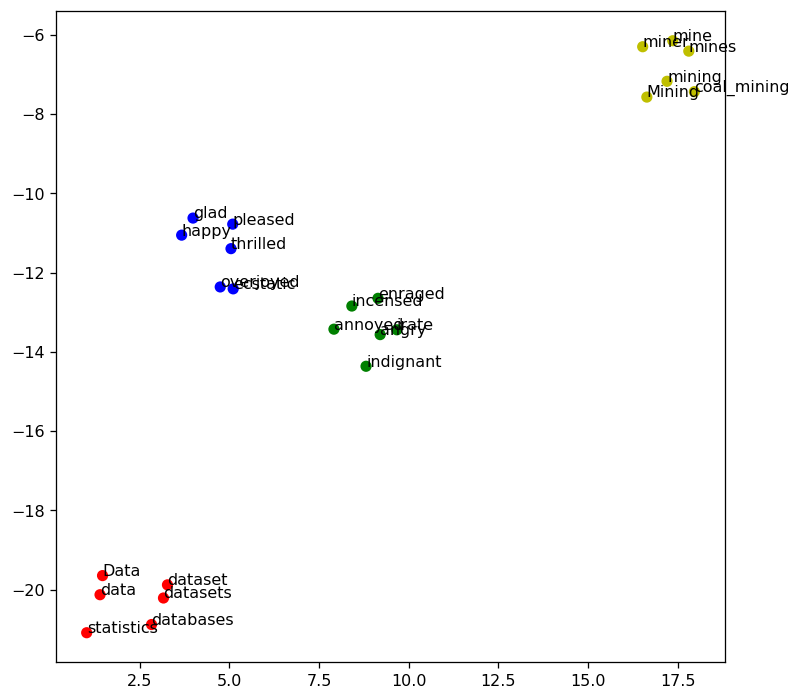

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [25]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

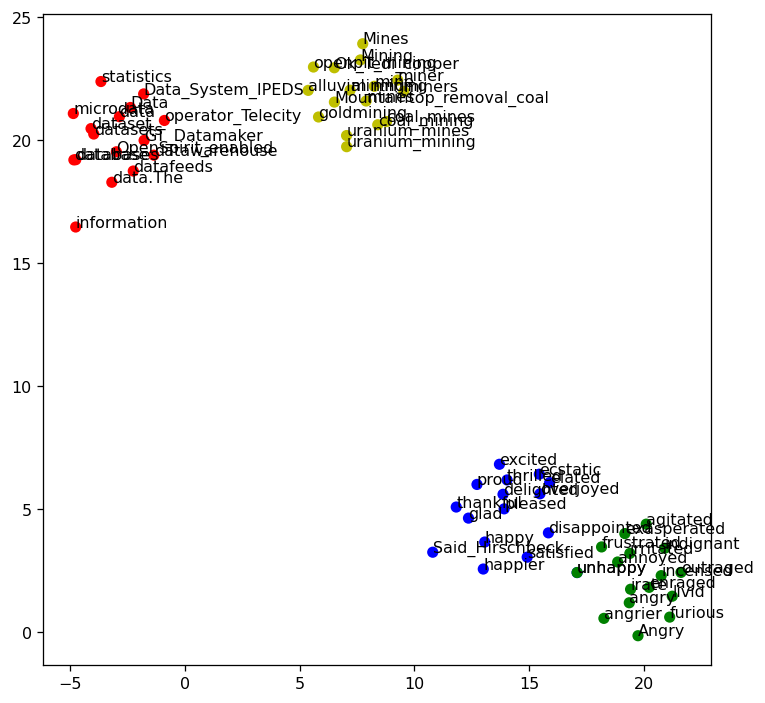

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---